In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
# Load your imbalanced data into a Pandas DataFrame
df = pd.read_csv('liver.csv')


In [10]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


[[ 1.52159826 -1.79898962 -0.42952576 ... -1.75189601 -1.33805261
  -0.48631598]
 [-0.84514935  0.55586758 -0.31892322 ...  0.27341273  0.30249034
   0.12883941]
 [-1.0370478   0.55586758 -0.39792504 ... -2.21219345 -0.95946577
   1.35915021]
 ...
 [-0.46135244  0.55586758 -0.4137254  ...  2.75901891  2.19542451
   0.12883941]
 [-1.74067547 -1.79898962 -0.44532613 ...  0.54959119  1.69064206
   2.28188331]
 [-1.74067547  0.55586758 -0.38212467 ...  0.36547222  1.31205523
   1.82051676]]


c:\Users\mrsoh\OneDrive\Documents\GitHub\Multiple-Disease-Prediction-Webapp\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mrsoh\OneDrive\Documents\GitHub\Multiple-Disease-Prediction-Webapp\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mrsoh\OneDrive\Documents\GitHub\Multiple-Disease-Prediction-Webapp\env\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\mrsoh\OneDrive\Documents\GitHub\Multiple-Disease-Prediction-Webapp\e

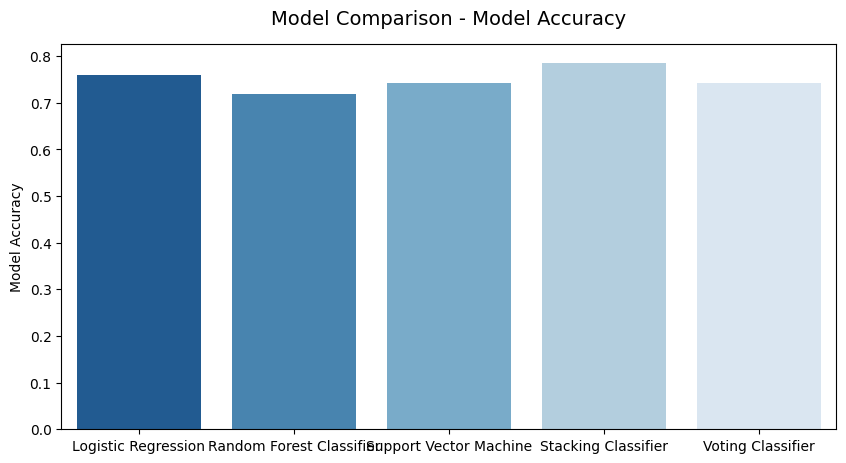


Confusion Matrix for Stacking Classifier:
[[76 11]
 [14 16]]

Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

           1       0.84      0.87      0.86        87
           2       0.59      0.53      0.56        30

    accuracy                           0.79       117
   macro avg       0.72      0.70      0.71       117
weighted avg       0.78      0.79      0.78       117


Confusion Matrix for Voting Classifier:
[[82  5]
 [25  5]]

Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           1       0.77      0.94      0.85        87
           2       0.50      0.17      0.25        30

    accuracy                           0.74       117
   macro avg       0.63      0.55      0.55       117
weighted avg       0.70      0.74      0.69       117



In [12]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score


# Assuming 'Dataset' is your target variable
X = df.drop("Dataset", axis=1)
y = df["Dataset"]

# Mapping numeric values for Gender (assuming 'Gender' is a binary variable)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})


# Filling missing values with the median
X.fillna(X.median(), inplace=True)

# Splitting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
# Save the trained model
import joblib
print(X_train)
joblib.dump(lr, 'liver_model.sav')
lr_score = lr.score(X_test, y_test)

# Random Forest Classifier - Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rfc = grid_search.best_estimator_
best_rfc_score = best_rfc.score(X_test, y_test)

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)

# Stacking Classifier
estimators = [
    ('lr', LogisticRegression()),
    ('best_rfc', best_rfc),
    ('svm', SVC())
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())
stacking_model.fit(X_train, y_train)
stacking_score = stacking_model.score(X_test, y_test)

# Voting Classifier
voting_model = VotingClassifier(estimators=estimators, voting='hard')
voting_model.fit(X_train, y_train)
voting_score = voting_model.score(X_test, y_test)

# Model Comparison
model_names = ["Logistic Regression", "Random Forest Classifier", "Support Vector Machine", "Stacking Classifier", "Voting Classifier"]
model_scores = [lr_score, best_rfc_score, svm_score, stacking_score, voting_score]

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=model_scores, palette="Blues_r")
plt.ylabel("Model Accuracy")
plt.title("Model Comparison - Model Accuracy", fontsize=14, fontname="Helvetica", y=1.03)
plt.show()

# Confusion Matrix and Classification Report for Stacking Classifier
y_pred_stacking = stacking_model.predict(X_test)
cf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
print("\nConfusion Matrix for Stacking Classifier:")
print(cf_matrix_stacking)
print("\nClassification Report for Stacking Classifier:")
print(classification_report(y_test, y_pred_stacking))

# Confusion Matrix and Classification Report for Voting Classifier
y_pred_voting = voting_model.predict(X_test)
cf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
print("\nConfusion Matrix for Voting Classifier:")
print(cf_matrix_voting)
print("\nClassification Report for Voting Classifier:")
print(classification_report(y_test, y_pred_voting))